## Modelling the imacts of parameter variation in a system of bacterial phenotypes under grazing stress 
### Stephen Williams

In this code we will work through the analysis of the following set of equations:

$$
\frac{dC}{dt} =  % Carbon ODE
-\frac{1}{e_b} \left(  % Rate const.
r_F \frac{C}{C+H_F}F % F growth
+ r_B \sigma \frac{C}{C+H_B}B % B growth
\right)\\
\frac{dF}{dt} =  
r_F \frac{C}{C+H_F}F % F Growth
- g_S \frac{F}{F+H_S}S % F eaten by pred S
- \chi_{FB}(B) \sigma F % Loss to biofilm
+ \chi_{BF} \sigma B \\ % Gain from biofilm\\
\frac{dB}{dt} =  
r_B \frac{C}{C+H_B}B % Biofilm growth
- g_T \frac{B}{B+H_T} T % B eaten by pred T
+ \chi_{FB}(B) \sigma F % Gain from free
- \chi_{BF} \sigma B % Loss to free
\\
\frac{dS}{dt} =  
e_S g_S \frac{F}{F+H_S} S % Gain by eating F
\\
%
\frac{dT}{dt} =  
e_T g_T \frac{B}{B+H_T} T % Gain by eating B
$$

In [3]:
# Get all the library imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from function_seiler import *

The first step in exploring the dynamics we can describe with this system will be to run a basic simulation of the values. The following sets the required nominal parameters, the initial conditions, and then solves the ODE system for these values (see functions_Seiler.py for the full ODE system). These can be found in https://academic.oup.com/femsec/article/93/9/fix112/4107106

In [4]:
## Set the nominal parameters
r20 = 0.21; r30 = 0.007; r40 = 0.12; r50 = 0.09 # Growth rates
eb = 0.2; e1 = 0.5; e2 = 0.5 # Efficiency
H20 = 1; H30 = 1; H40 = 1; H50 = 0.1 # Half saturation of type-2 consumption
chi0 = 0.005; a0 = 0.01; chimax0 = 0.05; chimin0 = 0.005 # Attachment parameters
params = [r20,r30,\
          eb,\
            H20,H30,\
              chi0,a0,chimax0,chimin0,\
              r40,r50,\
              e1,e2,\
                H50,H50]

constants = []

## Set the initial conditions
C0=3; F0=1; B0=0; S0=0.05; T0=0.05 # Initial population sizes
IC = [C0,F0,B0,S0,T0] # Initial conditions for the ODE system

## Define the time parameter for the solver
tmin=0; tmax=100; Ntimes=100 # Time bounds
tspan = np.linspace(tmin,tmax,Ntimes) # Timepoints for solution

sol = solve_ivp(lambda t,Y: dXdt(t,Y,params,constants), [tspan[0],tspan[-1]], IC)

We can now visualise this solution...

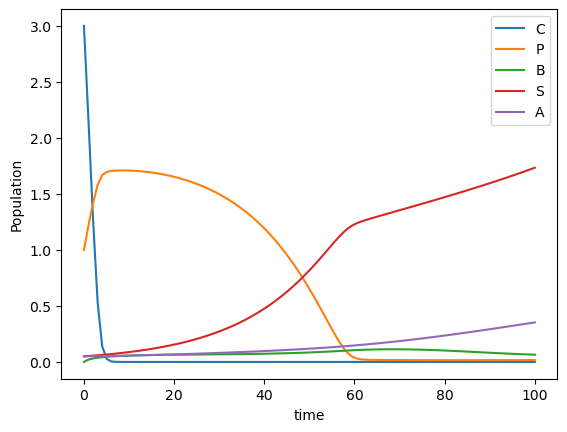

In [43]:
for i in range(5):
    plt.plot(sol.t,sol.y[i])
plt.xlabel("time")
plt.ylabel("Population")
plt.legend(["C","P","B","S","A"])
plt.show()

Now that we have an example to visualize the various outputs that this set of equations will produce, we can examine the structural identifiability present in a number of different output cases.

The next step is to construct the synthetic data needed to examine 

In [ ]:
# See the file -- structualIdentifiability.jl to see this section

- Confirm the identifiability (structural) using the Julia library on the equations (maybe have a look at a few "levels" of available information).
- Create a synthetic dataset from the data at 3-different [uniform] sample levels (6hr,3hr,1hr) for a 24 hour experiment.
- Calculate the log-likelihood profiles for [solutions + known noise] (cases: (i) constant and (ii) proportional), make the plots for these to determine which of the parameters are structurally identifiable given levels of noise.
- Get the 95% confidence evolution given the nominals (simulate 2^params sims with minimal/maximal parameter values and then plot all the solutions).
- Look at the Sobel indicies of the system (confirm that these are converging).